# starter notebook

##### A.I invasion hackathon

Just as we discussed in class, the first thing to do is the import the libraries you need, easy peazy. For me, I use boosting algorithms for competitions, that's why I didn't bring in any model from sklearn. Nevertheless, I'll still need stuff from there.

Note: If you have issues importing any of the boosting models, just go to your prompt and do (pip install XXXXXXX)

In [1]:
import numpy as np
import pandas as pd
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
#from xgboost import XGBRegressor

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

 Next bring in your dataset, train and test

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sub = pd.read_csv("SampleSubmission.csv")

check out the head

In [3]:
train.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206"


In [4]:
test.head()

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance
0,VHL18518,Abuja,BMW,323i,"2,008",White,Foreign Used,30524.0
1,VHL17149,Lagos,Toyota,Camry,"2,013",White,Foreign Used,NaN
2,VHL10927,Lagos,Toyota,Highlander Limited V6,"2,005",Gold,Foreign Used,NaN
3,VHL12909,Lagos,Toyota,Camry,"2,011",Gray,Foreign Used,166839.0
4,VHL12348,Lagos,Lexus,ES 350 FWD,"2,013",Red,Foreign Used,88862.0


Note: Your target is the Amount (Million Naira)

check where there are missing values

In [5]:
train.isnull().sum()

VehicleID                    0
Location                     0
Maker                        0
Model                        0
Year                        21
Colour                       0
Amount (Million Naira)      17
Type                       197
Distance                  2360
dtype: int64

Suprisingly, we see that our target has missing values. The most reasonable thing you can do is to delete the rows that have missing values for the label. The problem with filling the target is that if you fill it with rubbish, you'll be teaching your model rubbish, something you are not 100% sure of.

Remove train rows where target(Amount (Million Naira)) is missing and reset the numbering

In [6]:
train = train[~train["Amount (Million Naira)"].isnull()].reset_index(drop=True)

Check the head again

In [7]:
train.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206"


Drop vehicle ID, you don't need it

In [8]:
train = train.drop("VehicleID", axis=1)
test = test.drop("VehicleID", axis=1)
train.head()

,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852"
3,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000"
4,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206"


check out the head

In [9]:
train.head()

,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852"
3,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000"
4,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206"


In [10]:
train.isnull().sum()

Location                     0
Maker                        0
Model                        0
Year                        21
Colour                       0
Amount (Million Naira)       0
Type                       196
Distance                  2352
dtype: int64

#### Dealing with the Categorical data one by one.

Methods you can use: 

1. Cat codes - like the one we did in class
2. Label encoding - google it to learn more
3. One hot encoding - google it to learn more
4. Using counts - simply replacing it with the number of times it appears in the data

Here i'll use different methods

1. dealing with Location

In [11]:
train.Location.value_counts()

Lagos     3310
Abuja     3254
Ibadan     624
Name: Location, dtype: int64

There are just 3 cities, you can handle it as one hot encoding, I don't think lagos is better than ibadan or Abuja in the context of car price

In [12]:
dummies = pd.get_dummies (train["Location"]) #get the dummies
train = pd.concat([dummies,train], axis=1) # join it to the trainset
train = train.drop("Location", axis=1) #drop it, you don't need it again


# Do the same for test

dummies = pd.get_dummies (test["Location"]) #get the dummies
test = pd.concat([dummies,test], axis=1) # join it to the testset
test = test.drop("Location", axis=1) #drop it, you don't need it again

Check the head to see what it looks like now

In [13]:
train.head()

,Abuja,Ibadan,Lagos,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,1,0,0,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,0,1,0,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,0,0,1,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852"
3,1,0,0,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000"
4,0,1,0,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206"


2. Maker of the car

In [14]:
train.Maker.value_counts()

Toyota           2738
Lexus            1596
Mercedes-Benz    1211
Honda             357
Hyundai           160
Acura             154
Land Rover        124
Ford              120
BMW               110
Nissan            101
Peugeot            75
Kia                66
Volkswagen         54
Pontiac            30
Mazda              28
Dodge              24
Audi               23
Mitsubishi         22
Chevrolet          20
Infiniti           18
Jeep               18
Jaguar             12
Rolls-Royce        10
Mini                9
GMC                 8
Suzuki              8
Cadillac            7
Scion               7
Volvo               7
Porsche             7
Bentley             6
Maserati            6
Lincoln             6
Buick               5
Chrysler            4
Opel                4
Lamborghini         4
Renault             3
Fiat                3
Subaru              2
Citroen             2
GAC                 2
Saturn              2
JAC                 2
Rover               2
Hummer    

The cars are so many, I'll just use the Cat - codes method

In [15]:
train.Maker = train.Maker.astype("category") # convert to category type
train.Maker = train.Maker.cat.codes # tell pandas to encode it as numbers/codes


# Do the same for Test set


test.Maker = test.Maker.astype("category") # convert to category type
test.Maker = test.Maker.cat.codes # tell pandas to encode it as numbers/codes

See what the head looks like

In [16]:
train.head()

,Abuja,Ibadan,Lagos,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,1,0,0,17,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,0,1,0,19,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,0,0,1,29,RX 350,"2,010",Red,9.2,Foreign Used,"110,852"
3,1,0,0,34,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000"
4,0,1,0,52,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206"


3. Model of the car

In [17]:
train.Model = train.Model.astype("category") # convert to category type
train.Model = train.Model.cat.codes # tell pandas to encode it as numbers/codes

#Do the same for Test

test.Model = test.Model.astype("category") # convert to category type
test.Model = test.Model.cat.codes # tell pandas to encode it as numbers/codes

Check the head

In [18]:
train.head()

,Abuja,Ibadan,Lagos,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,1,0,0,17,116,"2,011",Silver,2.2,Nigerian Used,NaN
1,0,1,0,19,1047,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,0,0,1,29,906,"2,010",Red,9.2,Foreign Used,"110,852"
3,1,0,0,34,506,"2,017",Blue,22.8,Foreign Used,"30,000"
4,0,1,0,52,567,"2,002",Red,2.6,Nigerian Used,"125,206"


4. Colour of the cars - To me, the color does not affect price at all, so we can use catcodes if they are too many for making pandas dummies

In [19]:
train.Colour.value_counts()

Black       2118
Gray        1152
Silver      1120
White       1018
Blue         553
Red          478
Gold         356
Green        179
Brown        114
Burgandy      26
Beige         25
Purple        16
Orange        11
Yellow         7
Pink           7
Ivory          3
Violet         1
G              1
Teal           1
Mica           1
Pearl          1
Name: Colour, dtype: int64

In [20]:
train.Colour = train.Colour.astype("category") # convert to category type
train.Colour = train.Colour.cat.codes # tell pandas to encode it as numbers/codes

#Do the same for Test

test.Colour = test.Colour.astype("category") # convert to category type
test.Colour = test.Colour.cat.codes # tell pandas to encode it as numbers/codes

Check the head

In [21]:
train.head()

,Abuja,Ibadan,Lagos,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,1,0,0,17,116,"2,011",16,2.2,Nigerian Used,NaN
1,0,1,0,19,1047,"2,012",16,3.5,Nigerian Used,"125,000"
2,0,0,1,29,906,"2,010",15,9.2,Foreign Used,"110,852"
3,1,0,0,34,506,"2,017",2,22.8,Foreign Used,"30,000"
4,0,1,0,52,567,"2,002",15,2.6,Nigerian Used,"125,206"


4. Type of the car

In [22]:
train.Type.value_counts()

Foreign Used     4886
Nigerian Used    1889
Brand New         217
Name: Type, dtype: int64

Me, You and everyone else will agree that 

1. Brand new > Foreign used >Nigerian Used, 

so we'll use Label encoding, by simply ranking it. I'll map the values

In [23]:
train.Type = train.Type.map({"Nigerian Used": 0,"Foreign Used": 1, "Brand New": 2})


# Do the same for test

test.Type = test.Type.map({"Nigerian Used": 0,"Foreign Used": 1, "Brand New": 2})

In [24]:
train.head()

,Abuja,Ibadan,Lagos,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,1,0,0,17,116,"2,011",16,2.2,0.0,NaN
1,0,1,0,19,1047,"2,012",16,3.5,0.0,"125,000"
2,0,0,1,29,906,"2,010",15,9.2,1.0,"110,852"
3,1,0,0,34,506,"2,017",2,22.8,1.0,"30,000"
4,0,1,0,52,567,"2,002",15,2.6,0.0,"125,206"


Just before modelling, confirm that everything is okay

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7188 entries, 0 to 7187
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Abuja                   7188 non-null   uint8  
 1   Ibadan                  7188 non-null   uint8  
 2   Lagos                   7188 non-null   uint8  
 3   Maker                   7188 non-null   int8   
 4   Model                   7188 non-null   int16  
 5   Year                    7167 non-null   object 
 6   Colour                  7188 non-null   int8   
 7   Amount (Million Naira)  7188 non-null   float64
 8   Type                    6992 non-null   float64
 9   Distance                4836 non-null   object 
dtypes: float64(2), int16(1), int8(2), object(2), uint8(3)
memory usage: 273.9+ KB


Can you see that year and Distance is still an object, lets see it

In [26]:
train.Year.value_counts

<bound method IndexOpsMixin.value_counts of 0       2,011
1       2,012
2       2,010
3       2,017
4       2,002
        ...  
7183    2,018
7184    2,007
7185    2,010
7186    2,012
7187    2,012
Name: Year, Length: 7188, dtype: object>

we will need to repair it, the DSN guys have put comma after the first number so we can do more work

In [27]:
# see an example of repairing one of the number, there are 1 billion ways to do this
"".join("2,012".split(",")) #see an example

'2012'

use list comprehension to repair everything

In [28]:
train.Year = [("".join(str(i).split(","))) for i in train.Year]
train.Distance = [("".join(str(i).split(","))) for i in train.Year]




# Do for test

test.Year = [("".join(str(i).split(","))) for i in test.Year]
test.Distance = [("".join(str(i).split(","))) for i in test.Year]

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7188 entries, 0 to 7187
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Abuja                   7188 non-null   uint8  
 1   Ibadan                  7188 non-null   uint8  
 2   Lagos                   7188 non-null   uint8  
 3   Maker                   7188 non-null   int8   
 4   Model                   7188 non-null   int16  
 5   Year                    7188 non-null   object 
 6   Colour                  7188 non-null   int8   
 7   Amount (Million Naira)  7188 non-null   float64
 8   Type                    6992 non-null   float64
 9   Distance                7188 non-null   object 
dtypes: float64(2), int16(1), int8(2), object(2), uint8(3)
memory usage: 273.9+ KB


see above, that Year and distance is still an object, so we force it to become numbers

In [30]:
train.Year = pd.to_numeric(train.Year, errors = "coerce")
train.Distance = pd.to_numeric(train.Distance, errors = "coerce")


#Do for test

test.Year = pd.to_numeric(test.Year, errors = "coerce")
test.Distance = pd.to_numeric(test.Distance, errors = "coerce")

Check again

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7188 entries, 0 to 7187
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Abuja                   7188 non-null   uint8  
 1   Ibadan                  7188 non-null   uint8  
 2   Lagos                   7188 non-null   uint8  
 3   Maker                   7188 non-null   int8   
 4   Model                   7188 non-null   int16  
 5   Year                    7167 non-null   float64
 6   Colour                  7188 non-null   int8   
 7   Amount (Million Naira)  7188 non-null   float64
 8   Type                    6992 non-null   float64
 9   Distance                7167 non-null   float64
dtypes: float64(4), int16(1), int8(2), uint8(3)
memory usage: 273.9 KB


In [32]:
train.head()

,Abuja,Ibadan,Lagos,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,1,0,0,17,116,2011.0,16,2.2,0.0,2011.0
1,0,1,0,19,1047,2012.0,16,3.5,0.0,2012.0
2,0,0,1,29,906,2010.0,15,9.2,1.0,2010.0
3,1,0,0,34,506,2017.0,2,22.8,1.0,2017.0
4,0,1,0,52,567,2002.0,15,2.6,0.0,2002.0


In [33]:
train.isnull().sum()

Abuja                       0
Ibadan                      0
Lagos                       0
Maker                       0
Model                       0
Year                       21
Colour                      0
Amount (Million Naira)      0
Type                      196
Distance                   21
dtype: int64

### Dealing with Missing values

You have google, you have stack overflow, you have kaggle, you have zindi, you have tons of online tutorial, use the method you feel is appropraite, for me, I'll fill everything with the median. That's what makes sense to me, i won't explain here though

Using median on all the columns at once

In [34]:
train = train.fillna(train.median())

test = test.fillna(test.median())

In [35]:
train.isnull().sum()

Abuja                     0
Ibadan                    0
Lagos                     0
Maker                     0
Model                     0
Year                      0
Colour                    0
Amount (Million Naira)    0
Type                      0
Distance                  0
dtype: int64

Modelling

In [36]:
catboost_model = CatBoostRegressor() #use catboost
lightgbm_model= LGBMRegressor() #use lightgbm

Do the train test split

In [37]:
target = train["Amount (Million Naira)"]
train = train.drop("Amount (Million Naira)", axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(train,target,test_size=0.1)

In [38]:
catboost_model.fit(X_train, Y_train) 

Learning rate set to 0.054991
0:	learn: 24.0629224	total: 59.2ms	remaining: 59.1s
1:	learn: 23.4359465	total: 65.6ms	remaining: 32.7s
2:	learn: 22.8159846	total: 72.2ms	remaining: 24s
3:	learn: 22.2634674	total: 78.5ms	remaining: 19.5s
4:	learn: 21.7218759	total: 84.9ms	remaining: 16.9s
5:	learn: 21.2215173	total: 91.2ms	remaining: 15.1s
6:	learn: 20.7422515	total: 97.5ms	remaining: 13.8s
7:	learn: 20.3061315	total: 106ms	remaining: 13.1s
8:	learn: 19.9045990	total: 113ms	remaining: 12.4s
9:	learn: 19.5353330	total: 118ms	remaining: 11.6s
10:	learn: 19.1745675	total: 124ms	remaining: 11.1s
11:	learn: 18.8610336	total: 130ms	remaining: 10.7s
12:	learn: 18.5602257	total: 137ms	remaining: 10.4s
13:	learn: 18.2507315	total: 143ms	remaining: 10.1s
14:	learn: 17.9763915	total: 149ms	remaining: 9.8s
15:	learn: 17.7221728	total: 156ms	remaining: 9.58s
16:	learn: 17.4788712	total: 159ms	remaining: 9.19s
17:	learn: 17.2454495	total: 162ms	remaining: 8.83s
18:	learn: 17.0250622	total: 165ms	remai

213:	learn: 8.3832540	total: 703ms	remaining: 2.58s
214:	learn: 8.3673568	total: 706ms	remaining: 2.58s
215:	learn: 8.3603616	total: 709ms	remaining: 2.57s
216:	learn: 8.3447302	total: 711ms	remaining: 2.57s
217:	learn: 8.3375226	total: 714ms	remaining: 2.56s
218:	learn: 8.3287210	total: 717ms	remaining: 2.56s
219:	learn: 8.3211692	total: 720ms	remaining: 2.55s
220:	learn: 8.3017958	total: 723ms	remaining: 2.55s
221:	learn: 8.2921592	total: 726ms	remaining: 2.54s
222:	learn: 8.2752263	total: 728ms	remaining: 2.54s
223:	learn: 8.2659338	total: 730ms	remaining: 2.53s
224:	learn: 8.2597270	total: 733ms	remaining: 2.52s
225:	learn: 8.2348109	total: 736ms	remaining: 2.52s
226:	learn: 8.2115749	total: 738ms	remaining: 2.51s
227:	learn: 8.1954408	total: 741ms	remaining: 2.51s
228:	learn: 8.1913635	total: 744ms	remaining: 2.5s
229:	learn: 8.1841533	total: 747ms	remaining: 2.5s
230:	learn: 8.1686895	total: 749ms	remaining: 2.49s
231:	learn: 8.1472316	total: 751ms	remaining: 2.49s
232:	learn: 8.

400:	learn: 6.5751362	total: 1.23s	remaining: 1.83s
401:	learn: 6.5708092	total: 1.23s	remaining: 1.83s
402:	learn: 6.5666259	total: 1.23s	remaining: 1.82s
403:	learn: 6.5631093	total: 1.23s	remaining: 1.82s
404:	learn: 6.5557388	total: 1.24s	remaining: 1.82s
405:	learn: 6.5441958	total: 1.24s	remaining: 1.81s
406:	learn: 6.5383673	total: 1.24s	remaining: 1.81s
407:	learn: 6.5329926	total: 1.25s	remaining: 1.81s
408:	learn: 6.5247552	total: 1.25s	remaining: 1.8s
409:	learn: 6.5207593	total: 1.25s	remaining: 1.8s
410:	learn: 6.5100366	total: 1.25s	remaining: 1.8s
411:	learn: 6.4986489	total: 1.26s	remaining: 1.79s
412:	learn: 6.4908369	total: 1.26s	remaining: 1.79s
413:	learn: 6.4873162	total: 1.26s	remaining: 1.79s
414:	learn: 6.4832862	total: 1.27s	remaining: 1.78s
415:	learn: 6.4725825	total: 1.27s	remaining: 1.78s
416:	learn: 6.4670998	total: 1.27s	remaining: 1.78s
417:	learn: 6.4632745	total: 1.28s	remaining: 1.78s
418:	learn: 6.4608015	total: 1.28s	remaining: 1.77s
419:	learn: 6.4

599:	learn: 5.7114837	total: 1.75s	remaining: 1.17s
600:	learn: 5.7024491	total: 1.75s	remaining: 1.16s
601:	learn: 5.7006370	total: 1.76s	remaining: 1.16s
602:	learn: 5.6985317	total: 1.76s	remaining: 1.16s
603:	learn: 5.6958147	total: 1.76s	remaining: 1.16s
604:	learn: 5.6938483	total: 1.76s	remaining: 1.15s
605:	learn: 5.6864392	total: 1.77s	remaining: 1.15s
606:	learn: 5.6806089	total: 1.77s	remaining: 1.15s
607:	learn: 5.6769547	total: 1.77s	remaining: 1.14s
608:	learn: 5.6733557	total: 1.78s	remaining: 1.14s
609:	learn: 5.6699328	total: 1.78s	remaining: 1.14s
610:	learn: 5.6659293	total: 1.78s	remaining: 1.14s
611:	learn: 5.6609697	total: 1.79s	remaining: 1.13s
612:	learn: 5.6583133	total: 1.79s	remaining: 1.13s
613:	learn: 5.6531384	total: 1.79s	remaining: 1.13s
614:	learn: 5.6513050	total: 1.79s	remaining: 1.12s
615:	learn: 5.6482572	total: 1.8s	remaining: 1.12s
616:	learn: 5.6458415	total: 1.8s	remaining: 1.12s
617:	learn: 5.6426572	total: 1.8s	remaining: 1.11s
618:	learn: 5.6

791:	learn: 5.1535168	total: 2.27s	remaining: 597ms
792:	learn: 5.1524169	total: 2.28s	remaining: 594ms
793:	learn: 5.1478897	total: 2.28s	remaining: 592ms
794:	learn: 5.1466746	total: 2.28s	remaining: 589ms
795:	learn: 5.1436402	total: 2.29s	remaining: 586ms
796:	learn: 5.1411095	total: 2.29s	remaining: 583ms
797:	learn: 5.1390883	total: 2.29s	remaining: 580ms
798:	learn: 5.1380419	total: 2.29s	remaining: 577ms
799:	learn: 5.1350831	total: 2.3s	remaining: 574ms
800:	learn: 5.1327797	total: 2.3s	remaining: 571ms
801:	learn: 5.1316535	total: 2.3s	remaining: 568ms
802:	learn: 5.1293375	total: 2.3s	remaining: 565ms
803:	learn: 5.1282726	total: 2.31s	remaining: 562ms
804:	learn: 5.1275736	total: 2.31s	remaining: 559ms
805:	learn: 5.1254315	total: 2.31s	remaining: 556ms
806:	learn: 5.1220427	total: 2.31s	remaining: 553ms
807:	learn: 5.1191471	total: 2.31s	remaining: 550ms
808:	learn: 5.1163807	total: 2.32s	remaining: 547ms
809:	learn: 5.1147051	total: 2.32s	remaining: 544ms
810:	learn: 5.11

990:	learn: 4.7869589	total: 2.8s	remaining: 25.4ms
991:	learn: 4.7866816	total: 2.8s	remaining: 22.6ms
992:	learn: 4.7839979	total: 2.81s	remaining: 19.8ms
993:	learn: 4.7818376	total: 2.81s	remaining: 16.9ms
994:	learn: 4.7809828	total: 2.81s	remaining: 14.1ms
995:	learn: 4.7785754	total: 2.81s	remaining: 11.3ms
996:	learn: 4.7763951	total: 2.82s	remaining: 8.47ms
997:	learn: 4.7747233	total: 2.82s	remaining: 5.65ms
998:	learn: 4.7734163	total: 2.82s	remaining: 2.83ms
999:	learn: 4.7727710	total: 2.83s	remaining: 0us


In [39]:
from sklearn.metrics import mean_squared_error

check local score

In [40]:
mean_squared_error(Y_test, catboost_model.predict(X_test))

132.22158871364525

Check which features are the most important

<AxesSubplot:>

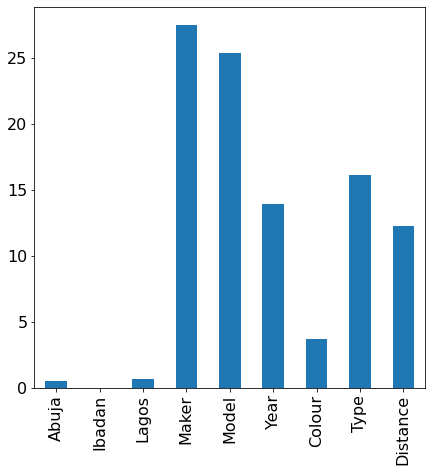

In [41]:
pd.Series(catboost_model.feature_importances_, index= X_train.columns).plot(kind="bar",figsize=(7, 7), fontsize=16)

#### predict on the test set

In [42]:
answers = catboost_model.predict(test)

put answers in the DF for submission, copy the sample submission

In [43]:
sub01 = sub.copy()

In [44]:
sub01.head()

,VehicleID,Amount (Million Naira)
0,VHL18518,1.0
1,VHL17149,1.0
2,VHL10927,1.0
3,VHL12909,1.0
4,VHL12348,1.0


In [45]:
sub01["Amount (Million Naira)"] = answers

In [46]:
sub01.head()

,VehicleID,Amount (Million Naira)
0,VHL18518,4.870801
1,VHL17149,5.166771
2,VHL10927,2.003656
3,VHL12909,3.417257
4,VHL12348,3.737615


Convert to csv file and submit to Zindi

In [47]:
#put your preferred name with dot csv
sub01.to_csv("CATBOOST PUT YOUR OWN NAME WITH DOT CSV.csv", index = False)

### Go and Submit to Zindi, check your score and come back here to continue.

#### Do the same for LightGBM

In [48]:
lightgbm_model.fit(X_train, Y_train) 

LGBMRegressor()

Check score

In [49]:
mean_squared_error(Y_test, lightgbm_model.predict(X_test))

115.75380374438207

<AxesSubplot:>

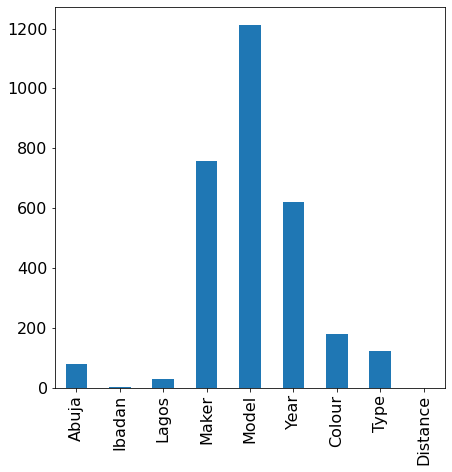

In [50]:
pd.Series(lightgbm_model.feature_importances_, index= X_train.columns).plot(kind="bar",figsize=(7, 7), fontsize=16)

In [51]:
answers = lightgbm_model.predict(test)
sub02 = sub.copy()
sub02["Amount (Million Naira)"] = answers

#put your preferred name with dot csv
sub02.to_csv("LIGHT GBM PUT YOUR OWN NAME WITH DOT CSV.csv", index = False)

In [52]:
sub02.head()

,VehicleID,Amount (Million Naira)
0,VHL18518,3.344842
1,VHL17149,8.053006
2,VHL10927,1.932395
3,VHL12909,3.368920
4,VHL12348,4.976370


### Go and Submit to Zindi, check your score and come back here to continue.

## Ensemble method! for the pros

Ensemble is simply combining your submissions to get a better one.

In [53]:
sub_ensemble = sub.copy()

In [54]:
sub_ensemble.head()

,VehicleID,Amount (Million Naira)
0,VHL18518,1.0
1,VHL17149,1.0
2,VHL10927,1.0
3,VHL12909,1.0
4,VHL12348,1.0


Read more, do it any how you see fit, you are the data scientist. I'll use 70% of the catboost and 30% of the lightgbm based on the local score, you can tweak as you see fit.

In [55]:
sub_ensemble["Amount (Million Naira)"] = 0.7*sub01["Amount (Million Naira)"] + 0.3*sub02["Amount (Million Naira)"]

Prepare to submit to zindi

In [56]:
sub_ensemble.to_csv("ENSEMBLE PUT YOUR OWN NAME WITH DOT CSV.csv", index = False)

## submit to zindi and check your score

Methods of improvement

1. Do feature engineering
2. Handle missing values better
3. Remove outliers
4. Use Kfold cross validation
5. Add more models to the ensemble.

I am always open to assist enthusiasts with difficulties they are facing in Machine learning and Deep learning. Feel free to reach out to me: most preferably LinkedIn.

. [Twitter](https://twitter.com/Osinkoluolufemi).

. [Linkedin](https://www.linkedin.com/in/olufemi-victor-tolulope).

. [Github](https://github.com/osinkolu)

#### Author: Olufemi Victor Tolulope